# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
train = pd.read_csv('train.csv')

In [3]:
from sklearn.feature_selection import SelectKBest, chi2
# remove unrelated column and split data into X and Y
# train = train.drop('Id', axis = 1)

In [4]:
# Found there is many nan values
train.isna().sum().sort_values(axis = 0, ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [5]:
# select the columns name that has more than around half
colnames = [i for i in train.isna().sum().sort_values(axis = 0, ascending = False).head(5).index]
train = train.drop(colnames, axis = 1)

<AxesSubplot:>

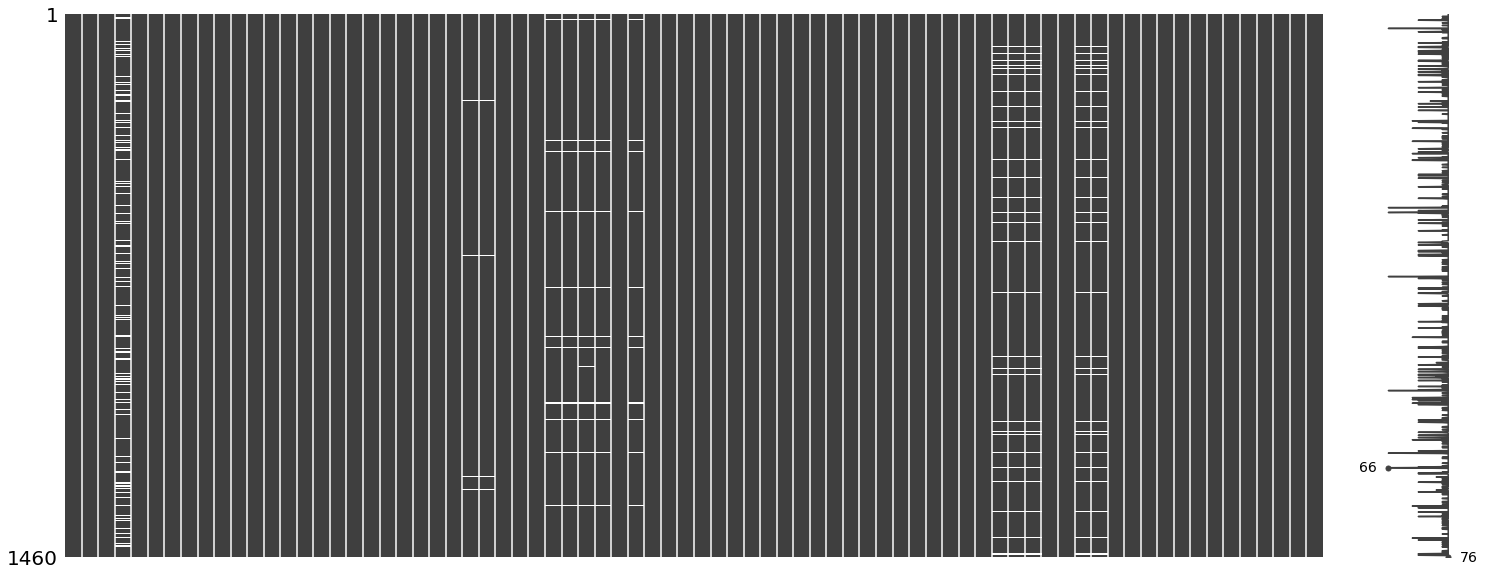

In [6]:
import missingno as msno
msno.matrix(train)

<AxesSubplot:>

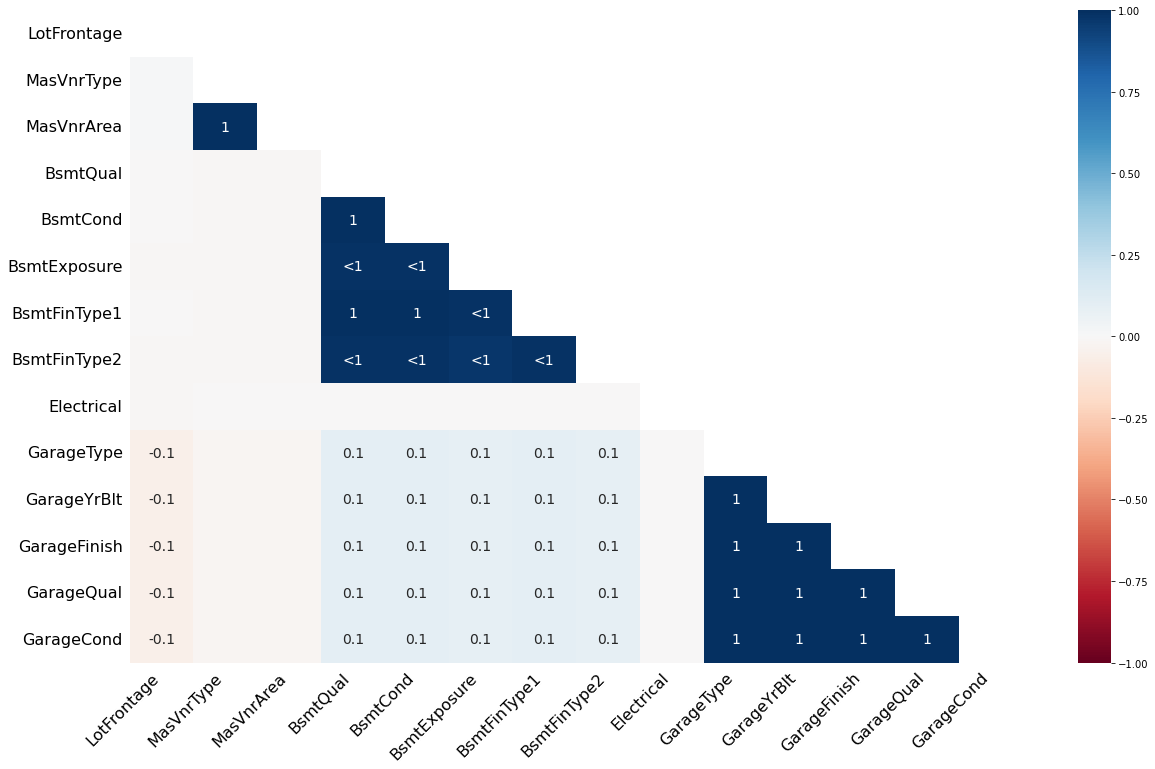

In [7]:
msno.heatmap(train)

<AxesSubplot:>

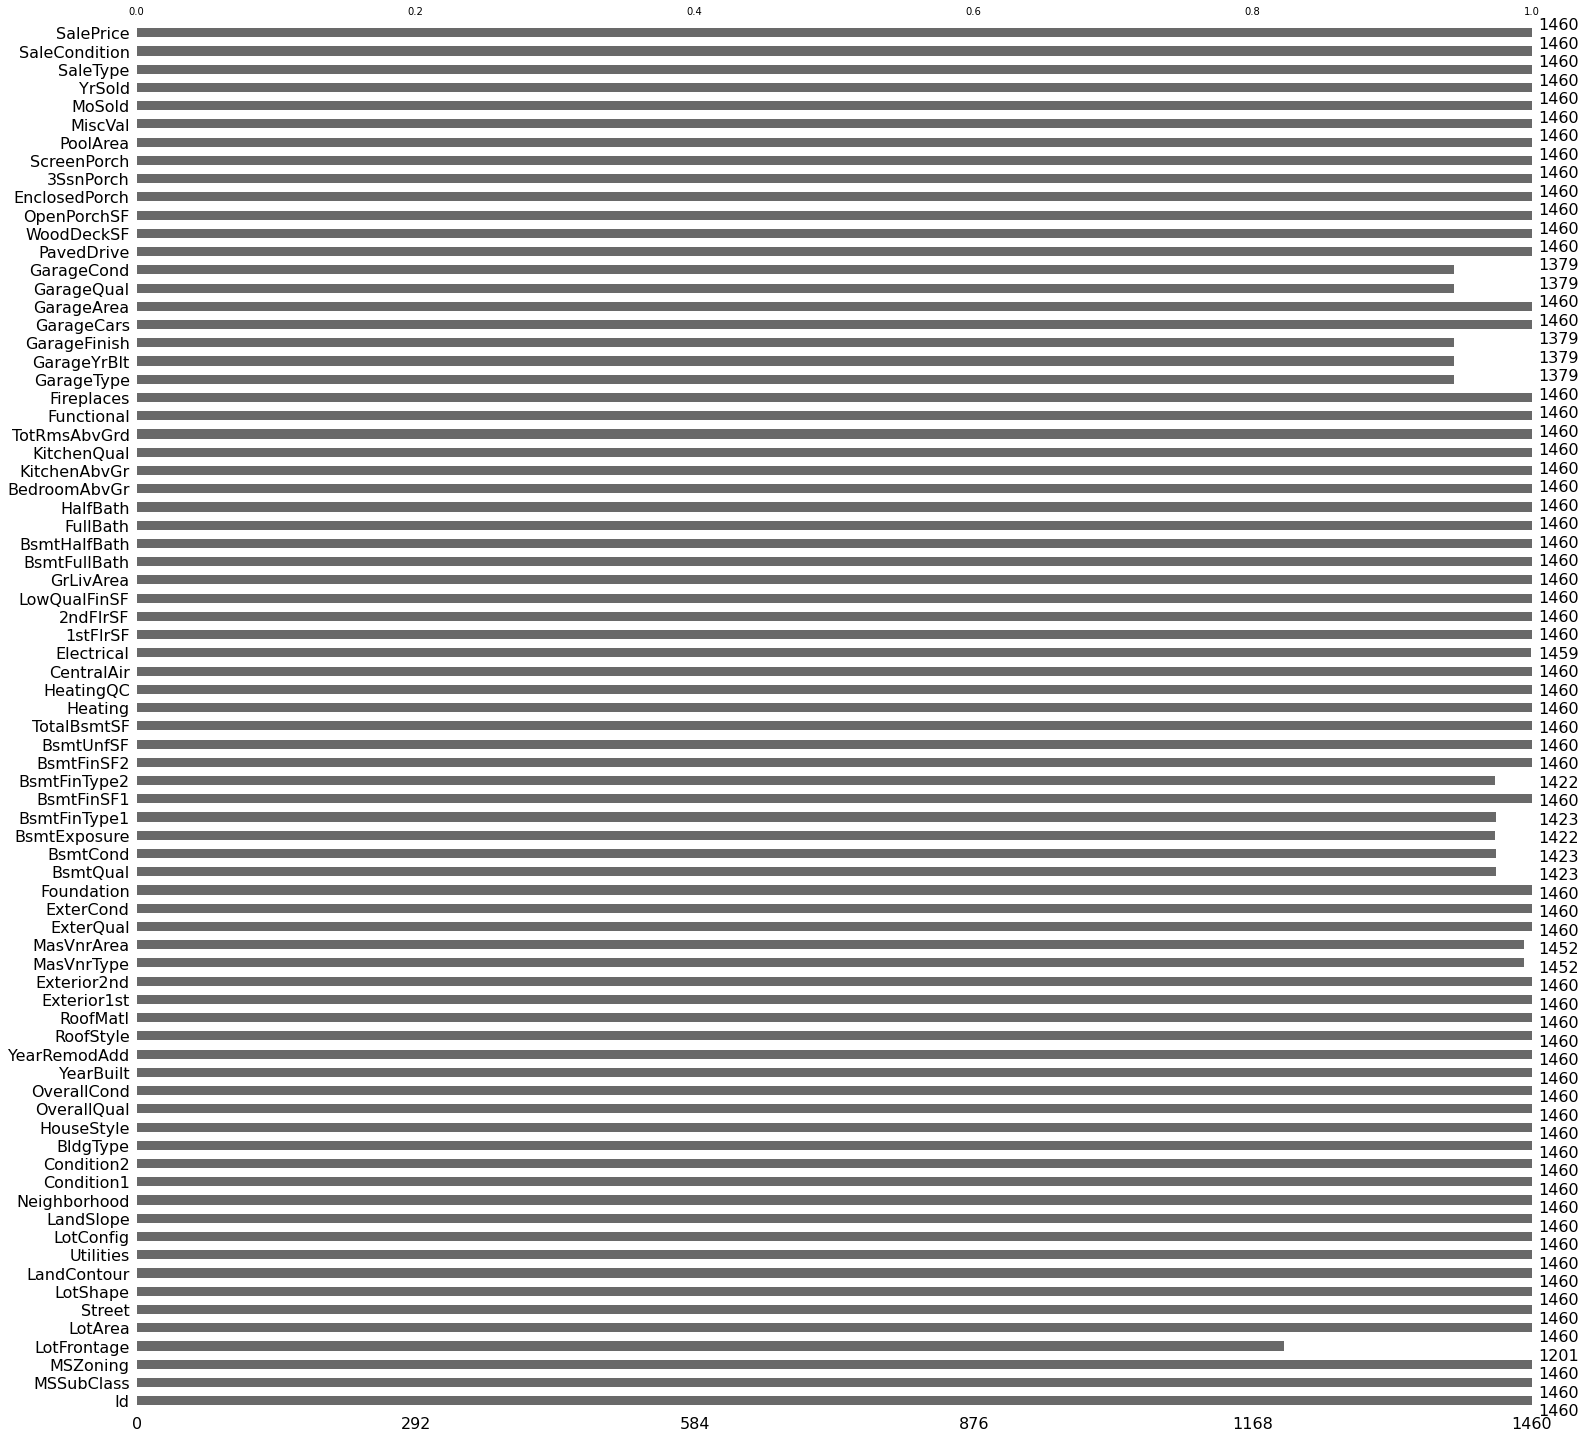

In [8]:
msno.bar(train)

In [9]:
train.isna().sum().sort_values(axis = 0, ascending = False).head(15)

LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
PavedDrive        0
dtype: int64

In [10]:
# drop nan rows with more than 8 nan values in the column
train = train.dropna(axis = 0, subset = [i for i in train.isna().sum().sort_values(axis = 0, ascending = False).head(11).index])

In [11]:
# Where Nan values still left
train.isna().sum().sort_values(axis = 0, ascending = False).head(3)

MasVnrType    6
MasVnrArea    6
Electrical    1
dtype: int64

In [12]:
# replace the nan values in the categorical columns to the most frequent type
# replace the nan values in the numerical column to the median of this column
train['MasVnrType'] = train['MasVnrType'].fillna('U')
train['MasVnrArea'] = train['MasVnrArea'].replace(np.nan, train['MasVnrArea'].median())
train['Electrical'] = train['Electrical'].fillna('U')

In [13]:
test_SalePrice = pd.read_csv('sample_submission.csv')

In [14]:
test = pd.read_csv('test.csv')
test = test.drop(colnames, axis = 1)
test = test.join(test_SalePrice, on = 'Id', how = 'left', rsuffix = '_')
test = test.drop('Id_', axis = 1)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [15]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [16]:
print(train.shape)
print(test.shape)
data = pd.concat([train,test], ignore_index = True)
data

(1101, 76)
(1459, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2556,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2557,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2558,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [17]:
cols = data.columns
num_cols = data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
# ID_cols = data['Id']
# data = data.drop('Id', axis=1)

# # Get one hot encoding of columns B
one_hot = pd.get_dummies(data)
one_hot
# data_encoded = data.drop(cat_cols, axis=1)
# data_encoded = data_encoded.join(one_hot)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2556,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
2557,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
2558,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
train = one_hot.iloc[0:1101,:]
test = one_hot.iloc[1101:,:]

In [19]:
test = test.drop('SalePrice', axis = 1)
test.to_csv('test_encoded.csv', index=False)

In [20]:
X = train.drop('SalePrice', axis = 1) 
Y = train['SalePrice']

In [21]:
# idx = []
# for column in cat_cols:
#     idx.append(X.columns.get_loc(column))
# # print(idx)
# id_array = np.asarray(idx)
# id_array

In [22]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# lenc = LabelEncoder()
# lencode = lenc.fit(X)
# X_labled = lencode.transform(X)
# enc = OneHotEncoder(categorical_features=id_array, sparse = False)
# encode = enc.fit(X)
# X_encoded = encode.transform(X)
# X_labled

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [24]:
#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

# Linear Regression

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

n_splits = 10
# seed = 7
kfold = KFold(n_splits = n_splits)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print('Linear Regression: %.3f' % result.mean())

Linear Regression: -23733420719392133120.000


In [26]:
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler

reg = LinearRegression(fit_intercept = True).fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [27]:
print('RMSLE: %.3f'% rmsle(y_pred,y_test))

RMSLE: 0.203


# Ridge Regression

In [28]:
from sklearn.linear_model import Ridge

n_splits = 10
# seed = 7
kfold = KFold(n_splits = n_splits)
model1 = Ridge()
Ridge = model1.fit(X_train, y_train)
y_pred = Ridge.predict(X_test)
# scoring = 'neg_mean_squared_error'
# result = cross_val_score(model1, X_encoded, Y, cv=kfold, scoring=scoring)
print('Ridge Regression: %.3f' % rmsle(y_pred,y_test))

Ridge Regression: 0.190


# Lasso Regression

In [29]:
# from sklearn.linear_model import Lasso

# # n_splits = 10
# # # seed = 7
# # kfold = KFold(n_splits = n_splits)
# model2 = Lasso()
# lasso = model2.fit(X_train, y_train)
# y_pred = Lasso.predict(X_test)
# # scoring = 'neg_mean_squared_error'
# # result = cross_val_score(model2, X_encoded, Y, cv=kfold, scoring=scoring)
# print('Lasso Regression: %.3f' % rmsle(y_pred,y_test))

# Elastic Net

In [30]:
# from sklearn.linear_model import ElasticNet

# n_splits = 10
# # seed = 7
# kfold = KFold(n_splits = n_splits)
# model3 = ElasticNet()
# scoring = 'neg_mean_squared_error'
# result = cross_val_score(model3, X_encoded, Y, cv=kfold, scoring=scoring)
# print('ElasticNet Regression: %.3f' % result.mean())

# KNeighbors Regression

In [31]:
from sklearn.neighbors import KNeighborsRegressor

model4 = KNeighborsRegressor()
KNR = model4.fit(X_train, y_train)
y_pred = KNR.predict(X_test)
# result = cross_val_score(model4, X_encoded, Y, cv=kfold, scoring=scoring)
print('KNeighbors Regression: %.3f' % rmsle(y_pred,y_test))

KNeighbors Regression: 0.237


# Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor

model5 = DecisionTreeRegressor()
DTR = model5.fit(X_train, y_train)
y_pred = DTR.predict(X_test)
# result = cross_val_score(model5, X_encoded, Y, cv=kfold, scoring=scoring)
print('KNeighbors Regression: %.3f' % rmsle(y_pred,y_test))

KNeighbors Regression: 0.209


# SVM regression

In [33]:
from sklearn.svm import SVR

model6 = SVR()
SVR = model6.fit(X_train, y_train)
y_pred = SVR.predict(X_test)
# result = cross_val_score(model5, X_encoded, Y, cv=kfold, scoring=scoring)
print('SVM: %.3f' % rmsle(y_pred,y_test))

SVM: 0.397


# Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

model7 = RandomForestRegressor()
RF = model7.fit(X_train, y_train)
y_pred = RF.predict(X_test)
# result = cross_val_score(model6, X_encoded, Y, cv=kfold, scoring=scoring)
print('Random Forest: %.3f' % rmsle(y_pred,y_test))

Random Forest: 0.150


In [35]:
# resultList = []
# for estimator_num in range(2, 101):
#     model = RandomForestRegressor(n_estimators=estimator_num)
#     result = cross_val_score(model, X_encoded, Y, cv=kfold, scoring=scoring)
#     resultList.append(np.abs(result.mean())) 
# # Minimum RMSE 31328.02675745841

# XGBoost

In [36]:
from xgboost import XGBRegressor

model8 = XGBRegressor()
XGB = model8.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
# result = cross_val_score(model7, X_encoded, Y, cv=kfold, scoring=scoring)
print('XGBoost: %.3f' % rmsle(y_pred,y_test))

XGBoost: 0.144


# AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostRegressor

model9 = AdaBoostRegressor()
Ada = model9.fit(X_train, y_train)
y_pred = Ada.predict(X_test)
# result = cross_val_score(model8, X_encoded, Y, cv=kfold, scoring=scoring)
print('AdaBoost: %.3f' % rmsle(y_pred,y_test))

AdaBoost: 0.187


In [38]:
type(y_pred)

numpy.ndarray

In [39]:
X_train.shape

(737, 268)

Intermediate conclusion: choosing XGBoost, Random Forest and AdaBoost Regression as the candidate models

# Tune the paramaters (XGBoost)

In [90]:
from xgboost import XGBRegressor

model8 = XGBRegressor(n_estimators = 342, eta  = 0.11, max_depth = 3, subsample = 0.6, 
                          num_parallel_tree = 3, seed = 0, colsample_bylevel = 0.7)
XGB = model8.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
print('XGBoost: %.4f' % rmsle(y_pred,y_test))

XGBoost: 0.1163


In [120]:
type(y_test)

pandas.core.series.Series

In [91]:
test_pred = XGB.predict(test)

In [92]:
test_pred

array([122913.7  , 157209.28 , 191266.77 , ..., 163693.16 , 125894.484,
       230949.73 ], dtype=float32)

array([1461, 1462, 1463, ..., 2917, 2918, 2919])

In [114]:
sub = pd.DataFrame(test_pred, test['Id'].values)
sub.columns = ['SalePrice']
sub = sub.rename_axis('Id')

,SalePrice
Id,
1461,122913.703125
1462,157209.281250
1463,191266.765625
1464,193314.312500
1465,215206.078125
...,...
2915,94416.546875
2916,93154.281250
2917,163693.156250


In [115]:
sub.to_csv('submission.csv', index = True)